In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import statsmodels as sms
import statsmodels.formula.api as smf

import seaborn as sns # for data visualization
sns.set_style("whitegrid")

from dateutil.relativedelta import *
from pandas.tseries.offsets import *

pd.set_option('display.max_columns', None)

DATA_FOLDER = '/Users/mmw/data/misp_data'

In [15]:
ret_decomp_dcf5 = pd.read_csv(f'{DATA_FOLDER}/decomp_dcf5y_RF_1970_2019.csv', index_col=0).replace([np.inf, -np.inf], np.nan).dropna()
# ret_decomp_dcf10 = pd.read_csv(f'{DATA_FOLDER}/decomp_dcf10y_hist_1970_2009.csv', index_col=0)

/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [16]:
monthly_misp = ret_decomp_dcf5.groupby('jdate_crsp').agg('mean')

In [17]:
monthly_misp.head()

,vt,permno,me,year,logret_3,logret_6,logret_24,cumret_3,cumret_6,cumret_24,logret_12,logret_36,logret_60,cumret_12,cumret_36,cumret_60,termlogret,termcumret,vt+3,me+3,vt+6,me+6,vt+12,me+12,vt+24,me+24,vt+36,me+36,vt+60,me+60,r_t+3,r*_t+3,r_unchg+3,r_chg+3,r_t+6,r*_t+6,r_unchg+6,r_chg+6,r_t+12,r*_t+12,r_unchg+12,r_chg+12,r_t+24,r*_t+24,r_unchg+24,r_chg+24,r_t+36,r*_t+36,r_unchg+36,r_chg+36,r_t+60,r*_t+60,r_unchg+60,r_chg+60,misp
jdate_crsp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-31,10.486401,27270.652502,11.247628,1970.0,-0.015972,-0.356707,0.002644,-0.003126,-0.270701,0.116685,-0.119657,0.037821,-0.670295,-0.058270,0.215395,-0.289011,2.698632,238.631186,10.486889,11.104190,10.486401,10.980882,10.509264,11.282309,10.549282,11.375429,10.605984,11.307142,10.718809,10.819566,-0.015972,0.000488,-0.019031,-0.140329,-0.356707,0.0,-0.019031,-0.260078,-0.119657,0.022863,-0.019031,0.011522,0.002644,0.062881,-0.019031,0.063297,0.037821,0.119583,-0.019031,-0.058568,-0.670295,0.232408,-0.019031,-0.643958,0.761227
1970-02-28,10.488974,27257.587902,11.294086,1970.0,-0.136761,-0.254696,0.129307,-0.113413,-0.194067,0.249487,0.037780,0.041302,-0.393559,0.089089,0.208980,-0.126077,2.702305,239.118448,10.489462,11.012291,10.488974,11.047577,10.511719,11.323339,10.551740,11.413978,10.608463,11.247335,10.722162,10.864787,-0.136761,0.000489,-0.020128,-0.275227,-0.254696,0.0,-0.020128,-0.240347,0.037780,0.022745,-0.020128,0.006345,0.129307,0.062766,-0.020128,0.055697,0.041302,0.119489,-0.020128,-0.162083,-0.393559,0.233188,-0.020128,-0.645925,0.805112
1970-03-31,10.488034,27263.227058,11.278625,1970.0,-0.275489,-0.233466,0.121828,-0.227389,-0.181977,0.238110,0.031554,-0.063635,-0.395128,0.079244,0.089449,-0.126151,2.706364,239.348128,10.488523,10.931292,10.488034,11.139966,10.510829,11.367943,10.550813,11.404296,10.607484,11.218536,10.721426,10.927646,-0.275489,0.000489,-0.019765,-0.339126,-0.233466,0.0,-0.019765,-0.135192,0.031554,0.022796,-0.019765,0.064860,0.121828,0.062779,-0.019765,0.061320,-0.063635,0.119450,-0.019765,-0.175050,-0.395128,0.233392,-0.019765,-0.569761,0.790591
1970-04-30,10.488941,27261.301512,11.111059,1970.0,-0.341925,-0.126620,0.126108,-0.274408,-0.100876,0.241980,0.088709,-0.075584,-0.316976,0.141251,0.072254,-0.080363,2.703271,239.124014,10.489430,10.987748,10.488941,11.076862,10.511717,11.384025,10.551695,11.404007,10.608453,11.152632,10.722160,10.948832,-0.341925,0.000489,-0.015553,-0.120705,-0.126620,0.0,-0.015553,-0.033342,0.088709,0.022776,-0.015553,0.243935,0.126108,0.062754,-0.015553,0.224439,-0.075584,0.119512,-0.015553,-0.075991,-0.316976,0.233219,-0.015553,-0.385560,0.622118
1970-05-31,10.489997,27278.122159,11.010741,1970.0,-0.117479,-0.022074,0.292983,-0.097389,0.002638,0.467637,0.273202,0.023999,-0.130799,0.373721,0.172705,0.111612,2.704109,239.564149,10.490487,11.045405,10.489997,11.087598,10.512867,11.329260,10.552868,11.385151,10.609636,11.079302,10.723275,11.001787,-0.117479,0.000490,-0.013019,0.033320,-0.022074,0.0,-0.013019,0.074936,0.273202,0.022869,-0.013019,0.288259,0.292983,0.062871,-0.013019,0.303751,0.023999,0.119639,-0.013019,-0.049801,-0.130799,0.233278,-0.013019,-0.236176,0.520743


In [18]:
monthly_misp['error60'] = monthly_misp['r_t+60'] - monthly_misp['r*_t+60'] - monthly_misp['r_chg+60'] -monthly_misp['r_unchg+60']

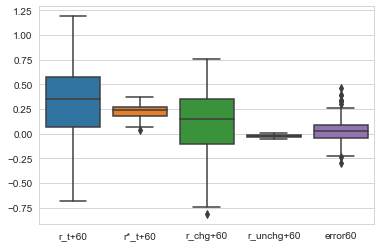

In [19]:
import seaborn as sns
ax = sns.boxplot(data=monthly_misp[["r_t+60",'r*_t+60','r_chg+60', 'r_unchg+60','error60']], dodge=False)
plt.savefig('ret60_retdecomp.png', dpi=300)

In [20]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_misp.index, y=monthly_misp['r_t+60'], name='r',
                         line=dict(color='black', width=2)))

fig.add_trace(go.Scatter(x=monthly_misp.index, y=monthly_misp['r*_t+60'], name='r*',
                         line=dict(color='crimson', width=2)))

fig.add_trace(go.Scatter(x=monthly_misp.index, y=monthly_misp['r_chg+60'], name='r_chg',
                         line=dict(color='darkblue', width=2)))

fig.update_layout(title='Monthly average future 5-year return components',
                   xaxis_title='Date',
                   yaxis_title='Log returns')

fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=10,
            color="black"
        ),
    )
)

fig.show()

In [15]:
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params

def fama_macbeth_summary(p):
    s = p.describe().T
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    return s[['mean','std_error','tstat', 'count', 'std']]

def fama_macbeth_reg_panel(regdf, xname='misp', yname='ret', 
                     csname='permno', tsname='jdate_crsp'): 
    # Panel factor setting FM reg
    gamma_cs = (regdf.groupby(tsname).apply(ols_coef,f'{yname} ~ {xname}'))
    gamma_cs = gamma_cs.rename(columns={"Intercept": "alpha_i_t", f"beta_{xname}": "lamba_t"})
    return fama_macbeth_summary(gamma_cs)

In [16]:
%%time
for m in [3, 6, 12, 36, 60]:
    ret_decomp_dcf5['ret'] = np.exp(ret_decomp_dcf5[f'r_t+{m}'])-1 # convert log ret to cum ret
    regdf = ret_decomp_dcf5[['jdate_crsp', 'permno', 'ticker', 'ret', 'misp']].replace([np.inf, -np.inf], np.nan).dropna()
    print(f'{m}-Month Return, 5Yr-DCF')
    print(fama_macbeth_reg_panel(regdf))
    print('')

3-Month Return, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  0.059743   0.003780  15.806508  600.0  0.092581
misp      -0.017778   0.000904 -19.673969  600.0  0.022134

6-Month Return, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  0.131069   0.005791  22.633874  600.0  0.141846
misp      -0.046959   0.001344 -34.927936  600.0  0.032932

12-Month Return, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  0.283620   0.008726  32.502431  600.0  0.213745
misp      -0.110675   0.002488 -44.482114  600.0  0.060945

36-Month Return, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  0.972976   0.019986  48.682927  600.0  0.489555
misp      -0.399014   0.010038 -39.751941  600.0  0.245870

60-Month Return, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  1.719533   0.036902  46.597178  600.0  0.903913
misp      -0.622491   0.018532 -33.589988  600.

In [17]:
%%time
for m in [3, 6, 12, 36, 60]:
    ret_decomp_dcf5['ret'] = np.exp(ret_decomp_dcf5[f'r*_t+{m}'])-1 # convert log ret to cum ret
    regdf = ret_decomp_dcf5[['jdate_crsp', 'permno', 'ticker', 'ret', 'misp']].replace([np.inf, -np.inf], np.nan).dropna()
    print(f'{m}-Month Counterfactual Return, 5Yr-DCF')
    print(fama_macbeth_reg_panel(regdf))
    print('')

3-Month Counterfactual Return, 5Yr-DCF
               mean  std_error     tstat  count       std
alpha_i_t -0.122617   0.028365 -4.322892  600.0  0.694786
misp       0.278961   0.064013  4.357872  600.0  1.567994

6-Month Counterfactual Return, 5Yr-DCF
               mean  std_error     tstat  count       std
alpha_i_t -0.248285   0.040397 -6.146180  600.0  0.989510
misp       0.564927   0.091786  6.154815  600.0  2.248292

12-Month Counterfactual Return, 5Yr-DCF
               mean  std_error     tstat  count       std
alpha_i_t -0.469899   0.057147 -8.222615  600.0  1.399813
misp       1.024509   0.113412  9.033501  600.0  2.778019

36-Month Counterfactual Return, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t -1.316546   0.162475  -8.103090  600.0  3.979798
misp       2.698360   0.263085  10.256626  600.0  6.444229

60-Month Counterfactual Return, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t -1.668136   0.179943  -9.27036

In [19]:
%%time
for m in [3, 6, 12, 36, 60]:
    ret_decomp_dcf5['ret'] = np.exp(ret_decomp_dcf5[f'r_chg+{m}'])-1 # convert log ret to cum ret
    regdf = ret_decomp_dcf5[['jdate_crsp', 'permno', 'ticker', 'ret', 'misp']].replace([np.inf, -np.inf], np.nan).dropna()
    print(f'{m}-Month Return due to Change in Misp, 5Yr-DCF')
    print(fama_macbeth_reg_panel(regdf))
    print('')

3-Month Return due to Change in Misp, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  0.065909   0.005867  11.233209  600.0  0.143719
misp      -0.036819   0.004214  -8.737525  600.0  0.103218

6-Month Return due to Change in Misp, 5Yr-DCF
               mean  std_error     tstat  count       std
alpha_i_t  0.143808   0.016947  8.485682  600.0  0.415118
misp      -0.088125   0.014211 -6.201244  600.0  0.348094

12-Month Return due to Change in Misp, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  0.292672   0.025216  11.606603  600.0  0.617663
misp      -0.186592   0.021950  -8.500930  600.0  0.537653

36-Month Return due to Change in Misp, 5Yr-DCF
               mean  std_error      tstat  count       std
alpha_i_t  1.320420   0.068139  19.378275  600.0  1.669063
misp      -0.697764   0.047300 -14.751917  600.0  1.158606

60-Month Return due to Change in Misp, 5Yr-DCF
               mean  std_error      tstat  count       std